# Task Sheet 1
## Scalability
### by Benedict Finsterwalder and Venkata Asodi



### Task 1.1 Scaling of a Computer System

#### a) Plot P (X = i) for a reasonable interval of X and α ∈ {0.01, 0.1, 0.5, 1}.

In [21]:
import math
import random

import matplotlib.pyplot as plt
import numpy as np

In [18]:
def poisson_distribution(lam, i):
    return (math.pow(math.e, -lam)*math.pow(lam, i))/math.factorial(i)

In [19]:
alphas = [0.01, 0.1, 0.5, 1.0]
i_values = list(range(0, 20))

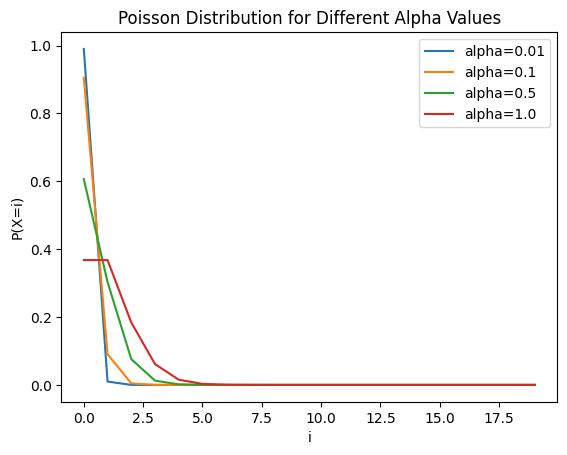

In [20]:

plt.figure()

for a in alphas:
    y = [poisson_distribution(a, i) for i in i_values]
    plt.plot(i_values, y, label=f"alpha={a}")

plt.xlabel("i")
plt.ylabel("P(X=i)")
plt.legend()
plt.title("Poisson Distribution for Different Alpha Values")

plt.show()

#### b) Implement a program that samples numbers of incoming jobs from P (X = i).

In [22]:
def sample_incoming_jobs(alpha, n_samples=1000):
    lam = alpha
    return np.random.poisson(lam, size=n_samples)

[0 0 1 0 0 0 0 2 1 1 1 1 0 0 0 0 0 0 0 0]


#### c) Implement a model that iterates over these two phases: calculate and administrate new incoming jobs, then operate on the current job (one at a time). Generate a sample of 2000 time steps for α = 0.1 and a processing duration of 4 steps per job. What is the average length of the waiting list?

In [32]:
jobs = sample_incoming_jobs(0.1, 2000)
waiting_list = 0
work_counter = 0
queue = []
counter = 0
while True:
    if counter < len(jobs):
        job = jobs[counter]
        waiting_list += job
        print("Currently ", waiting_list , " jobs in the queue")
    if work_counter == 0:
        if waiting_list > 0:
            waiting_list -= 1
            work_counter = 3
    else:
        work_counter -= 1
    print("work counter at ", work_counter)
    queue.append(waiting_list)
    # Either we stop when the whole waiting list is empty and no new job comes in
    temp_bool = waiting_list == 0 and work_counter == 0 and counter > len(jobs)
    # Or we step when the n time steps end
    temp_bool = counter == len(jobs) - 1
    if temp_bool:
        break
    counter += 1
print(np.mean(queue))

Currently  1  jobs in the queue
work counter at  3
Currently  0  jobs in the queue
work counter at  2
Currently  0  jobs in the queue
work counter at  1
Currently  0  jobs in the queue
work counter at  0
Currently  1  jobs in the queue
work counter at  3
Currently  1  jobs in the queue
work counter at  2
Currently  2  jobs in the queue
work counter at  1
Currently  2  jobs in the queue
work counter at  0
Currently  2  jobs in the queue
work counter at  3
Currently  2  jobs in the queue
work counter at  2
Currently  2  jobs in the queue
work counter at  1
Currently  2  jobs in the queue
work counter at  0
Currently  2  jobs in the queue
work counter at  3
Currently  1  jobs in the queue
work counter at  2
Currently  1  jobs in the queue
work counter at  1
Currently  1  jobs in the queue
work counter at  0
Currently  1  jobs in the queue
work counter at  3
Currently  0  jobs in the queue
work counter at  2
Currently  0  jobs in the queue
work counter at  1
Currently  0  jobs in the queue

#### d) Change your program such that you can average the waiting time list length over many samples (independent runs of your model over 2000 time steps each). Determine the average list length for rates α ∈ [0.005, 0.25] in steps of 0.005 based on 200 samples and plot it.

In [42]:
def working_day(a, processing_dur=3, n=2000):
    jobs = sample_incoming_jobs(a, n)
    waiting_list = 0
    work_counter = 0
    queue = []
    counter = 0
    while True:
        if counter < len(jobs):
            job = jobs[counter]
            waiting_list += job
        if work_counter == 0:
            if waiting_list > 0:
                waiting_list -= 1
                work_counter = processing_dur
        else:
            work_counter -= 1
        queue.append(waiting_list)
        # Either we stop when the whole waiting list is empty and no new job comes in
        temp_bool = waiting_list == 0 and work_counter == 0 and counter > len(jobs)
        # Or we step when the n time steps end
        temp_bool = counter == len(jobs) - 1
        if temp_bool:
            break
        counter += 1
    return queue

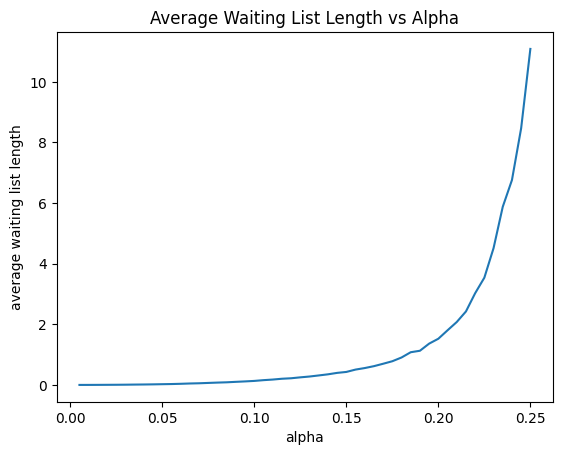

In [41]:
alphas = [round(x * 0.005, 3) for x in range(1, 51)]
avg_length = []
for a in alphas:
    avg = sum(np.mean(working_day(a)) for _ in range(200)) / 200
    avg_length.append(avg)

plt.figure()
plt.plot(alphas, avg_length)
plt.xlabel("alpha")
plt.ylabel("average waiting list length")
plt.title("Average Waiting List Length vs Alpha")
plt.show()

#### e) Do the same for a processing duration of only 2 steps per job with rates α ∈ [0.005, 0.5] in steps of 0.005. Compare the two plots.

In [53]:
alphas = [round(x * 0.005, 3) for x in range(1, 101)]
avg_length_1 = []
for a in alphas:
    avg = sum(np.mean(working_day(a, 1)) for _ in range(200)) / 200
    avg_length_1.append(avg)

In [50]:
alphas = [round(x * 0.005, 3) for x in range(1, 101)]
avg_length_2 = []
for a in alphas:
    avg = sum(np.mean(working_day(a, 3)) for _ in range(200)) / 200
    avg_length_2.append(avg)

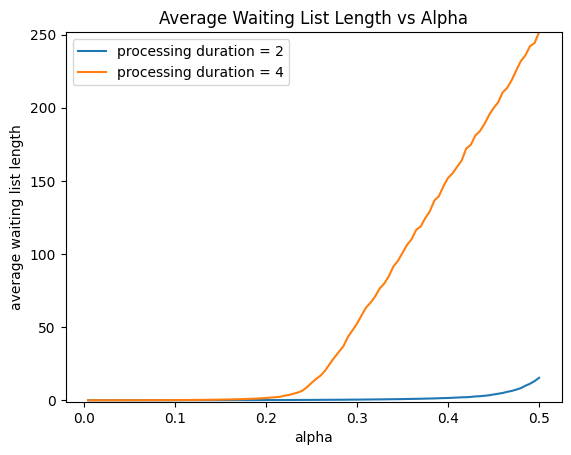

In [57]:
plt.figure()

plt.plot(alphas, avg_length_1, label="processing duration = 2")
plt.plot(alphas, avg_length_2, label="processing duration = 4")

plt.ylim(-1, max(avg_length_2))
plt.xlabel("alpha")
plt.ylabel("average waiting list length")
plt.title("Average Waiting List Length vs Alpha")
plt.legend()

plt.show()


we can clearly see that if we reduce the processing duration, the curve starts to rise later. So just reducing the processing time greatly increased the efficiency of our system.

### Task 1.2 Stick Pulling

In [61]:
import random

In [65]:
class Robot():
    def __init__(self, M, omega_wait):
        self.state = "waiting"
        self.site = random.randrange(M)
        self.timer = omega_wait
        self.omega_wait = omega_wait
        self.M = M
    def start_travel(self, N, travel_funciton):
        new_site = random.randrange(self.M)
        while new_site == self.site:
            new_site = random.randrange(self.M)
        self.site = new_site
        self.state = "traveling"
        self.timer = travel_funciton(N)
    def arrive(self):
        self.state = "waiting"
        self.timer = self.omega_wait

    def step(self, N, travel_function):
        self.timer -= 1
        if self.state == "traveling" and self.timer <= 0:
            self.arrive()
            return True
        if self.state == "waiting" and self.timer <= 0:
            self.start_travel(N, travel_function)
            return False
        return False
def travel_time_linear(N):
    return N + random.choice([0, 1, 2])

def travel_time_quadratic(N):
    return int(0.12 * N**2) + random.choice([0, 1, 2])

def simulation(N, steps = 50000, M = 20, omega_wait = 7, travel_model = "linear"):

    if travel_model == "linear":
        travel_function = travel_time_linear
    else:
        travel_function = travel_time_quadratic

    robots = [Robot(M, omega_wait) for _ in range(N)]
    pulls = 0

    for _ in range(steps):
        arrivals = {s: [] for s in range(M)}

        for i, r in enumerate(robots):
            arrived = r.step(N, travel_function)
            if arrived:
                arrivals[r.site].append(i)

        for s in range(M):
            if len(arrivals[s]) >= 2:
                pulls += 1

                for i in arrivals[s]:
                    robots[i].start_travel(N, travel_function)
    return pulls

In [105]:
pulls = simulation(N=3, steps=10000, travel_model="linear")
print("Linear travel pulls:", pulls)

pulls_q = simulation(N=3, steps=10000, travel_model="quadratic")
print("Quadratic travel pulls:", pulls_q)


Linear travel pulls: 11
Quadratic travel pulls: 13


Simulation for 1000 time steps for different system sizes (2, ..., 20) with averaging over 5000 runs

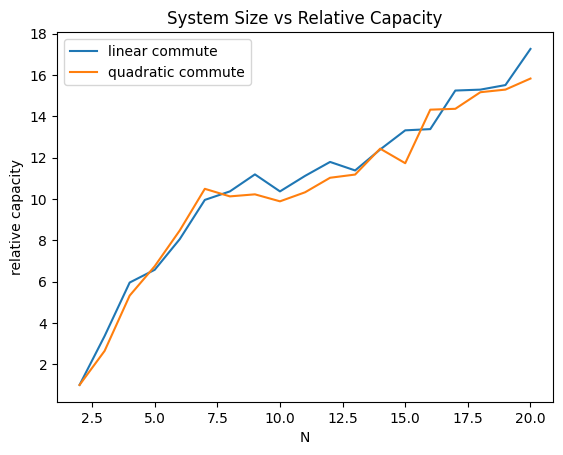

In [70]:

M = 20
omega_wait = 7
steps = 1000
N_values = list(range(2, 21))
runs = 5000

avg_linear = []
avg_quadratic = []

for N in N_values:
    total_l = 0
    total_q = 0
    for _ in range(runs):
        total_l += simulation(N, steps, M, omega_wait, travel_time_linear)
        total_q += simulation(N, steps, M, omega_wait, travel_time_quadratic)
    avg_linear.append(total_l / runs)
    avg_quadratic.append(total_q / runs)

# relative capacity normalized by N=2
base_l = avg_linear[0]
base_q = avg_quadratic[0]

rel_linear = [v / base_l for v in avg_linear]
rel_quadratic = [v / base_q for v in avg_quadratic]



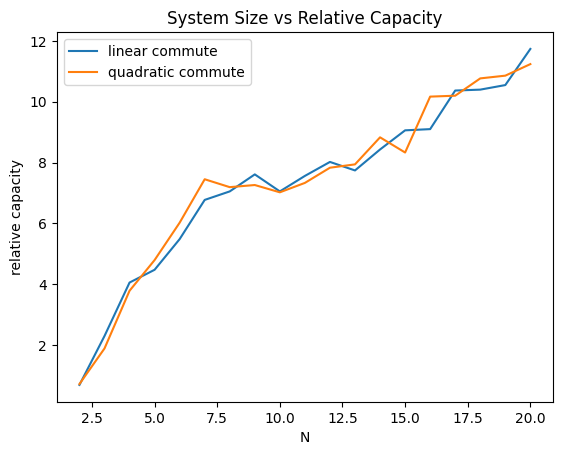

In [71]:
# plot
plt.figure()
plt.plot(N_values, avg_linear, label="linear commute")
plt.plot(N_values, avg_quadratic, label="quadratic commute")
plt.xlabel("N")
plt.ylabel("relative capacity")
plt.title("System Size vs Relative Capacity")
plt.legend()
plt.show()

I would have expected the curves to be farther away from each other. The linear commute should be much faster. This seems to only be the case for higher numbers of robots (N) and higher time steps (>> 1000). At a lower robot population the system with the quadratic travel function actually performs better.